In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [4]:
df = pd.read_csv("abalone.csv")

In [5]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

# I

**Train-test Split**

In [8]:
features = df.drop(['Rings'],axis=1)
target = df['Rings']

In [9]:
train_df, test_df = train_test_split(df,test_size=0.3, random_state=42)

In [10]:
train_df.to_csv("abalone_train.csv",index=False)
test_df.to_csv("abalone_test.csv",index=False)

# II

In [11]:
df.corr(method='pearson')['Rings'].sort_values(ascending=False)[1:]

Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

 *As we can see from above Series, the attribute **'Shell weight'** is having the highest pearson's correlation value with the target variable **'Rings'**.*

In [12]:
train_df_hc = pd.read_csv("abalone_train.csv")

In [13]:
X_train_hc = df['Shell weight'].to_numpy().reshape((-1,1))
y_train_hc = df['Rings'].to_numpy().reshape((-1,1))

In [16]:
weigths_hc = inv(X_train_hc.T @ X_train_hc) @ X_train_hc.T @ y_train_hc
weigths_hc

array([[34.73321255]])

In [17]:
y_pred = X_train_hc @ weigths_hc

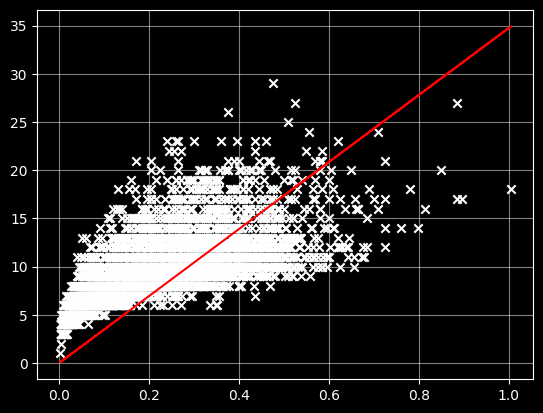

In [37]:
plt.style.use('dark_background')
plt.scatter(X_train_hc, y_train_hc, color='white', marker='x')
plt.plot(X_train_hc, y_pred, color='r')
plt.grid(alpha=0.5) 
plt.show()

In [45]:
y_train_hc

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]])

In [46]:
y_pred

array([[ 5.20998188],
       [ 2.43132488],
       [ 7.29397463],
       ...,
       [10.69782946],
       [10.28103091],
       [17.19294021]])

In [63]:
def RMSE_percentage(y_true, y_pred):
    mysum = 0
    for i,j in zip(y_true,y_pred):
        # print(mysum)
        mysum += (i-j)**2
    mysum /= len(y_true)
    mysum = mysum**0.5
    mysum /= np.mean(y_true)
    return mysum

In [65]:
RMSE_percentage(y_train_hc, y_pred)

array([0.41367658])